$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 20165549\ \ JANG\ \ JAE\ \ YONG$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

$i = 1, 2, \cdots, n$

$\hat{y}_i = \sigma(z_i)$

$z_i = w^T x_i + b$

$\sigma(z) = \frac{1}{1 + \exp(-z)}$

$\mathcal{L} = \frac{1}{n} \sum_{i=1}^n f_i(w, b)$

$f_i(w, b) = - y_i \log \hat{y}_i - (1 - y_i) \log (1 - \hat{y}_i)$

1. Plot two clusters of points for training dateset

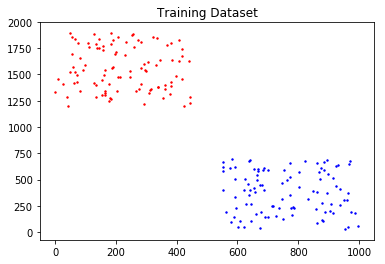

In [2]:
# u^prime = u - 10^(-5) * x
# v^prime = v - 10^(-5) * y
# b^prime = b - 10^(-5)

x_lim = 1000

X = np.empty(200, dtype=float)
Y = np.empty(200, dtype=float)
L = np.empty(200, dtype=float)

# Training Dataset

x_1 = np.random.randint(0, 450, 100)
y_1 = np.random.randint(1200, 1900, 100)

x_2 = np.random.randint(550, 1000, 100)
y_2 = np.random.randint(0, 700, 100)

for i in range(100):
    X[i] = x_1[i]
    X[100 + i] = x_2[i]
    Y[i] = y_1[i]
    Y[100 + i] = y_2[i]
    L[i] = 0
    L[100 + i] = 1

plt.title('Training Dataset')
for x in range(200):
    if x < 100:
        plt.scatter(X[x], Y[x], c='r', s=2)
    else:
        plt.scatter(X[x], Y[x], c='b', s=2)

2. Plot two clusters of points for testing dataset

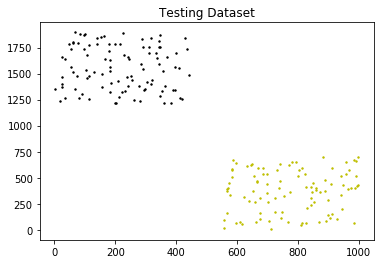

In [3]:
# Testing Dataset

tX = np.empty(200, dtype=float)
tY = np.empty(200, dtype=float)

tx_1 = np.random.randint(0, 450, 100)
ty_1 = np.random.randint(1200, 1900, 100)

tx_2 = np.random.randint(550, 1000, 100)
ty_2 = np.random.randint(0, 700, 100)


for i in range(100):
    tX[i] = tx_1[i]
    tX[100 + i] = tx_2[i]
    tY[i] = ty_1[i]
    tY[100 + i] = ty_2[i]

plt.title('Testing Dataset')
for x in range(200):
    if x < 100:
        plt.scatter(tX[x], tY[x], c='k', s=2)
    else:
        plt.scatter(tX[x], tY[x], c='y', s=2)

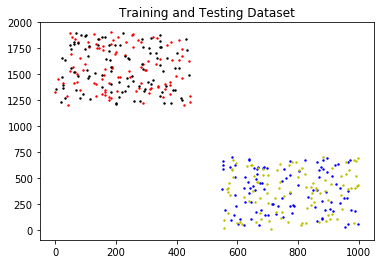

In [4]:
plt.title('Training and Testing Dataset')

for x in range(200):
    if x < 100:
        plt.scatter(X[x], Y[x], c='r', s=2)
    else:
        plt.scatter(X[x], Y[x], c='b', s=2)
for x in range(200):
    if x < 100:
        plt.scatter(tX[x], tY[x], c='k', s=2)
    else:
        plt.scatter(tX[x], tY[x], c='y', s=2)

Apply the gradient descent algorithm

In [36]:
dj = np.empty(200, dtype=float)
loss_arr = np.zeros(200, dtype=float)
t_loss_arr = np.zeros(200, dtype=float)

# initialize
u = 5
v = 5
b = 5

runningRate = 10**(-5)

def sigmoid(x):
    return 1/(1 + np.exp(x))

iteration = 20

for iter in range(iteration):
    for i in range(200):
        dj[i] = sigmoid(u*X[i] + v*Y[i] + b) - L[i]

    u = u - runningRate*np.sum(dj[:]*X[:])*(-1)
    v = v - runningRate*np.sum(dj[:]*Y[:])*(-1)
    b = b - runningRate*np.sum(dj[:])*(-1)
    
    training_loss = 0
    testing_loss = 0
    
    for i in range(200):
        if L[i] == 1:
            if sigmoid(u*X[i] + v*Y[i] + b) <= 0.5: # loss count
                training_loss += 1

        else:
            if sigmoid(u*X[i] + v*Y[i] + b) > 0.5: # loss count
                training_loss += 1

    for i in range(200):
        if L[i] == 1:
            if sigmoid(u*tX[i] + v*tY[i] + b) <= 0.5: # loss count
                testing_loss += 1

        else:
            if sigmoid(u*tX[i] + v*tY[i] + b) > 0.5: # loss count
                testing_loss += 1
    
    loss_arr[iter] = training_loss
    t_loss_arr[iter] = testing_loss

3.Plot the learning curves

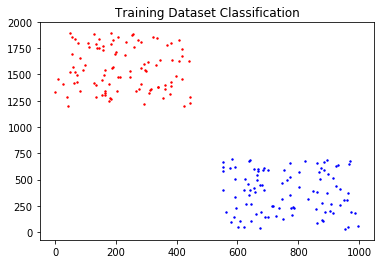

In [43]:
plt.title('Training Dataset Classification')

for i in range(200):
    res = sigmoid(u*X[i] + v*Y[i] + b)
    if res > 0.5:
        plt.scatter(X[i], Y[i], c='b', s=2)
    else:
        plt.scatter(X[i], Y[i], c='r', s=2)

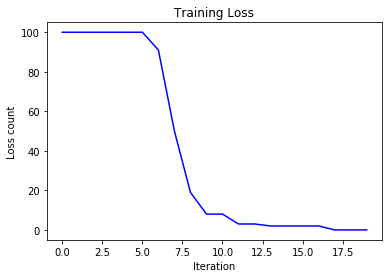

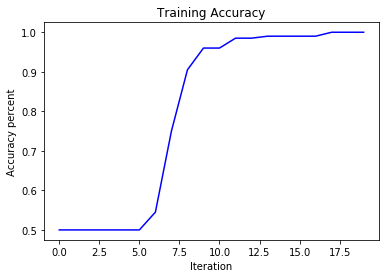

In [39]:
x = range(iteration)
y = loss_arr[x]

plt.plot(x, y, "BLUE")
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss count')
plt.show()

x = range(iteration)
y = (200 - loss_arr[x])/200

plt.plot(x, y, "BLUE")
plt.title('Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy percent')
plt.show()

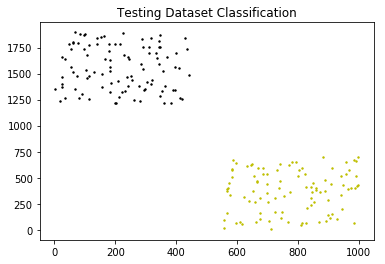

In [44]:
plt.title('Testing Dataset Classification')

for i in range(200):
    res = sigmoid(u*tX[i] + v*tY[i] + b)
    if res > 0.5:
        plt.scatter(tX[i], tY[i], c='y', s=2)
    else:
        plt.scatter(tX[i], tY[i], c='k', s=2)

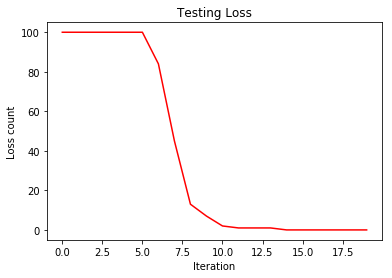

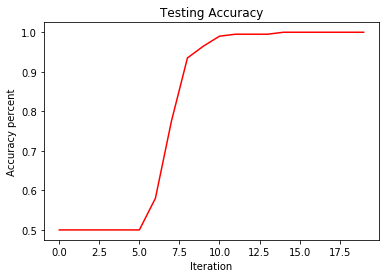

In [40]:
x = range(iteration)
y = t_loss_arr[x]

plt.plot(x, y, "RED")
plt.title('Testing Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss count')
plt.show()

x = range(iteration)
y = (200 - t_loss_arr[x])/200

plt.plot(x, y, "RED")
plt.title('Testing Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy percent')
plt.show()

Training loss and testing loss at every iteration

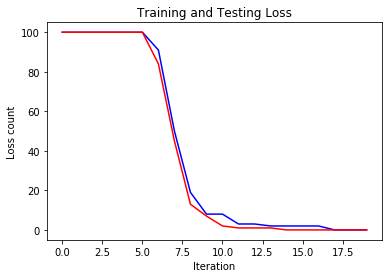

In [41]:
x = range(iteration)
y1 = loss_arr[x]
y2 = t_loss_arr[x]

plt.plot(x, y1, "BLUE")
plt.plot(x, y2, "RED")
plt.title('Training and Testing Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss count')
plt.show()

Training accuracy and testing accuracy at every iteration

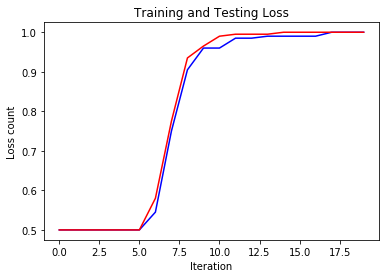

In [42]:
x = range(iteration)
y1 = (200 - loss_arr[x])/200
y2 = (200 - t_loss_arr[x])/200

plt.plot(x, y1, "BLUE")
plt.plot(x, y2, "RED")
plt.title('Training and Testing Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss count')
plt.show()